#PyTorch

##Integrantes:
LEONARDO FABIO GRISALES HURTADO

JORGE LUIS GUECHE MANQUILLO

JORGE ANDRES JARAMILLO NEME 

JUAN STIVEN MOLINA GRAJALES

EDGAR FERNANDO PAREDES BANGUERO

##¿Qué es PyTorch?
PyTorch es una librería open source basada en Python, enfocada a la realización de cálculos numéricos mediante programación de tensores, lo que facilita su aplicación al desarrollo de aplicaciones de aprendizaje profundo. La sencillez de su interfaz, y su capacidad para ejecutarse en GPUs (lo que acelera el entrenamiento de los modelos), lo convierten en la opción más asequible para crear redes neuronales artificiales.

Estas redes neuronales se han convertido, quizá, en la rama más prometedora de la inteligencia artificial, siendo la base de otras tecnologías como los sistemas de traducción automática, de reconocimiento de imágenes, facial, de voz.
## ¿Por qué usar PyTorch? 
PyTorch dispone una interfaz muy sencilla para la creación de redes neuronales pese a trabajar de forma directa con tensores sin la necesidad de una librería a un nivel superior como pueda ser Keras para Theano o Tensorflow.

PyTorch dispone de soporte para su ejecución en tarjetas gráficas (GPU), utiliza internamente CUDA, una API que conecta la CPU con la GPU que ha sido desarrollado por NVIDIA
##¿Qué se puede usar con PyTorch?
-Matrices.

-Algebra lineal.

-Creación de una red de feedforward.

Torch es uno de los frameworks de Deep Learning más populares en el mundo, dominando gran parte de la comunidad de investigación en los últimos años (solo recientemente rivalizado con los principales frameworks patrocinados por Google, Tensorflow  y Keras)
##Aplicaciones
Originalmente desarrollado por FAER (siglas de Facebook AI Research), PyTorch ha sido a su vez una pieza fundamental en el desarrollo de relevantes aplicaciones de inteligencia artificial, como el Autopilot de Tesla y el Pyro de Uber.

Con el tiempo, y gracias a una facilidad de uso no reñida con su uso en el ámbito industrial, PyTorch se ha convertido en uno de los frameworks de Deep Learning más populares del mundo, al que solo le hacen sombra TensorFlow y Keras, ambos respaldados por el patrocinio de Google.





## Importando PyTorch



In [ ]:
import torch
torch.__version__

'1.12.1+cu113'

## Introducción a los Tensores 

Ahora que tenemos PyTorch importado, es hora de aprender acerca de los tensores.

Los tensores son el bloque de construcción fundamental del aprendizaje automático.

Su función es representar datos de forma numérica.

Por ejemplo, se puede representar una imagen como un tensor con forma `[3, 224, 224]` lo que significaría `[colour_channels, height, width]`, como la imagen tiene `3` canales de color (red, green, blue), una altura de `224` píxeles y una anchura de `224` píxeles.

![example of going from an input image to a tensor representation of the image, image gets broken down into 3 colour channels as well as numbers to represent the height and width](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-tensor-shape-example-of-image.png)

En lenguaje tensorial (el utilizado para describir los tensores), el tensor tendría tres dimensiones, una para `colour_channels`, `height` y `width`.

Los Tensores de PyTorch son similares a los Vectores de NumPy, pero también se pueden operar en una GPU de Nvidia compatible con CUDA. PyTorch soporta varios subtipos de Tensores.

Parece haber 4 tipos principales de tensores en PyTorch: tensores de Byte, Float, Double y Long. Cada tipo de tensor corresponde al tipo de número (y más importante, el tamaño / indicación del número) contenido en cada lugar de la matriz. Entonces, si un Tensor de 1-d es una “lista de números”, un Tensor de Flotación de 1-d es una lista de flotadores . Como regla general, para peso matries usamos FloatTensors. Para las matrices de datos, es probable que usemos FloatTensors (para entradas con valores reales) o Long Tensors (para enteros).




##Modulos

###Autograd module
PyTorch utiliza un método llamado diferenciación Automática. Unos registrador registra lo que las operaciones que se han hecho, y luego las reproduce hacia atrás para calcular los gradientes. Este método es especialmente potente cuando se están construyendo redes neuronales para ahorrar tiempo en una época en la que calcular la diferenciación de los parámetros es un paso adelante.
###Optim module
torch.optim es un módulo que implementa varios algoritmos de optimización que se utilizan para construir redes neuronales. La mayoría de los métodos comúnmente usados ya son compatibles, por lo que no hay ninguna necesidad de crearlos desde cero
###Nn module
PyTorch Autograd hace que sea fácil definir gráficos computacionales y coger distintos grados, pero Raw Autograd puede ser un nivel demasiado bajo para definir redes neuronales complejas. Por esto es por lo que se creó el módulo nn, para ayudar a crear redes neuronales más complejas.





##Flujo de trabajo en Pytorch






<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>


| **Topic** | **Contents** |
| ----- | ----- |
| **1. Getting data ready** | Data can be almost anything but to get started we're going to create a simple straight line |
| **2. Building a model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. | 
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Saving and loading a model** | You may want to use your model elsewhere, or come back to it later, here we'll cover that. |
| **6. Putting it all together** | Let's take all of the above and combine it. |

## Ejemplo: Linear Regression Model

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.12.1+cu113'

Now let's start making our code device agnostic by setting `device="cuda"` if it's available, otherwise it'll default to `device="cpu"`.



In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


If you've got access to a GPU, the above should've printed out:

```
Using device: cuda
```
Otherwise, you'll be using a CPU for the following computations. This is fine for our small dataset but it will take longer for larger datasets.

### 6.1 Data

Let's create some data just like before.

First, we'll hard-code some `weight` and `bias` values.

Then we'll make a range of numbers between 0 and 1, these will be our `X` values.

Finally, we'll use the `X` values, as well as the `weight` and `bias` values to create `y` using the linear regression formula (`y = weight * X + bias`).

In [ ]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Wonderful!

Now we've got some data, let's split it into training and test sets.

We'll use an 80/20 split with 80% training data and 20% testing data.

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Excellent, let's visualize them to make sure they look okay.

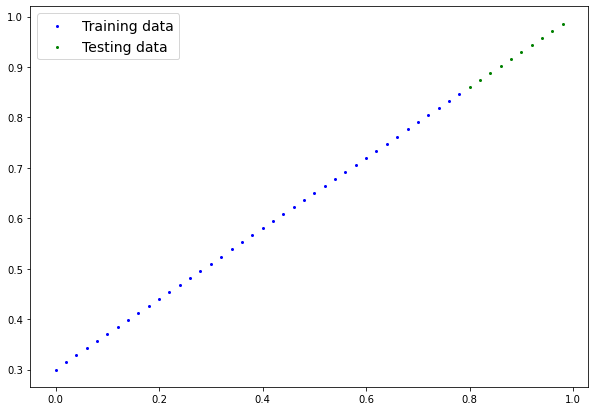

In [ ]:
# Note: If you've reset your runtime, this function won't work, 
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch linear model

We've got some data, now it's time to make a model.

We'll create the same style of model as before except this time, instead of defining the weight and bias parameters of our model manually using `nn.Parameter()`, we'll use [`nn.Linear(in_features, out_features)`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) to do it for us.

Where `in_features` is the number of dimensions your input data has and `out_features` is the number of dimensions you'd like it to be output to.

In our case, both of these are `1` since our data has `1` input feature (`X`) per label (`y`).

![comparison of nn.Parameter Linear Regression model and nn.Linear Linear Regression model](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png)
*Creating a linear regression model using `nn.Parameter` versus using `nn.Linear`. There are plenty more examples of where the `torch.nn` module has pre-built computations, including many popular and useful neural network layers.*


In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

Notice the outputs of `model_1.state_dict()`, the `nn.Linear()` layer created a random `weight` and `bias` parameter for us.

Now let's put our model on the GPU (if it's available).

We can change the device our PyTorch objects are on using `.to(device)`.

First let's check the model's current device.

In [ ]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

Wonderful, looks like the model's on the CPU by default.

Let's change it to be on the GPU (if it's available).

In [ ]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

Nice! Because of our device agnostic code, the above cell will work regardless of whether a GPU is available or not.

If you do have access to a CUDA-enabled GPU, you should see an output of something like:

```
device(type='cuda', index=0)
```

### 6.3 Training

Time to build a training and testing loop.

First we'll need a loss function and an optimizer.

Let's use the same functions we used earlier, `nn.L1Loss()` and `torch.optim.SGD()`.

We'll have to pass the new model's parameters (`model.parameters()`) to the optimizer for it to adjust them during training. 

The learning rate of `0.1` worked well before too so let's use that again.




In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

Beautiful, loss function and optimizer ready, now let's train and evaluate our model using a training and testing loop.

The only different thing we'll be doing in this step compared to the previous training loop is putting the data on the target `device`.

We've already put our model on the target `device` using `model_1.to(device)`.

And we can do the same with the data.

That way if the model is on the GPU, the data is on the GPU (and vice versa).

Let's step things up a notch this time and set `epochs=1000`.

If you need a reminder of the PyTorch training loop steps, see below.

<details>
    <summary>PyTorch training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing its
            <code>forward()</code> function
            calculations (<code>model(x_train)</code>).
        </li>
        <li><b>Calculate the loss</b> - The model's outputs (predictions) are compared to the ground truth and evaluated
            to see how
            wrong they are (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - The optimizers gradients are set to zero (they are accumulated by default) so they
            can be
            recalculated for the specific training step (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Perform backpropagation on the loss</b> - Computes the gradient of the loss with respect for every model
            parameter to
            be updated (each parameter
            with <code>requires_grad=True</code>). This is known as <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step the optimizer (gradient descent)</b> - Update the parameters with <code>requires_grad=True</code>
            with respect to the loss
            gradients in order to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>

In [ ]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 1000 

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


> **Note:** Due to the random nature of machine learning, you will likely get slightly different results (different loss and prediction values) depending on whether your model was trained on CPU or GPU. This is true even if you use the same random seed on either device. If the difference is large, you may want to look for errors, however, if it is small (ideally it is), you can ignore it.

Nice! That loss looks pretty low.

Let's check the parameters our model has learned and compare them to the original parameters we hard-coded.

In [ ]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Ho ho! Now that's pretty darn close to a perfect model.

Remember though, in practice, it's rare that you'll know the perfect parameters ahead of time.

And if you knew the parameters your model had to learn ahead of time, what would be the fun of machine learning?

Plus, in many real-world machine learning problems, the number of parameters can well exceed tens of millions.

I don't know about you but I'd rather write code for a computer to figure those out rather than doing it by hand.

### 6.4 Making predictions

Now we've got a trained model, let's turn on it's evaluation mode and make some predictions.

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

If you're making predictions with data on the GPU, you might notice the output of the above has `device='cuda:0'` towards the end. That means the data is on CUDA device 0 (the first GPU your system has access to due to zero-indexing), if you end up using multiple GPUs in the future, this number may be higher. 

Now let's plot our model's predictions.

> **Note:** Many data science libraries such as pandas, matplotlib and NumPy aren't capable of using data that is stored on GPU. So you might run into some issues when trying to use a function from one of these libraries with tensor data not stored on the CPU. To fix this, you can call [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) on your target tensor to return a copy of your target tensor on the CPU.

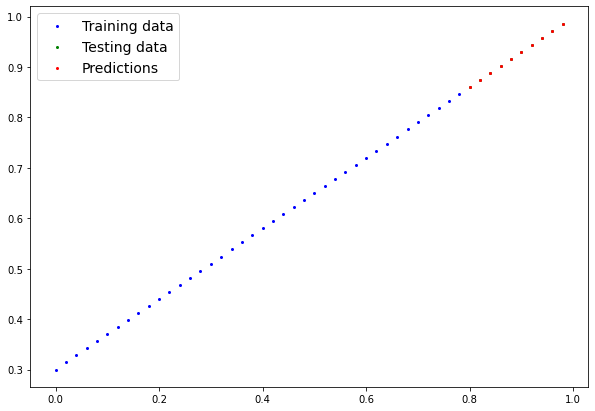

In [ ]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

Woah! Look at those red dots, they line up almost perfectly with the green dots. I guess the extra epochs helped.



### 6.5 Saving and loading a model

We're happy with our models predictions, so let's save it to file so it can be used later.



In [ ]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_1.pth


And just to make sure everything worked well, let's load it back in.

We'll:
* Create a new instance of the `LinearRegressionModelV2()` class
* Load in the model state dict using `torch.nn.Module.load_state_dict()`
* Send the new instance of the model to the target device (to ensure our code is device-agnostic)

In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


Now we can evaluate the loaded model to see if its predictions line up with the predictions made prior to saving.

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

# Ejemplo 2

In [ ]:
import torch
import torch.nn as nn
import numpy as np 
import matplotlib.pyplot as plt

#hiper parametros 
input_size = 1
output_size = 1 
num_epochs = 100
learning_rate = 0.001

# dataset manual con array Numpy 

x_train = np.array([[3.3], [4.4],[5.5],[6.71],[6.93],[4.168],[9.779],[6.182],[7.59],[2.167],[7.042],[10.792],[5.313],[7.997],[3.1]], dtype=np.float32)
y_train = np.array([[1, 7], [2.76, 0], [2.09, 0], [3.19, 0], [1.694, 0], [1.563, 0], [3.366, 0], [2.596, 0], [2.53, 0], [1.221, 0], [2.827, 0], [3.465, 0], [1.65, 0], [2.904, 0], [1.3, 0]], dtype=np.float32)

# definiendo el modelo de regresion inicial 

model = nn.Linear(input_size, output_size)

#perdida y optimizador 

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# entrenado el modelo 

for epoch in range(num_epochs):
  inputs = torch.from_numpy(x_train)
  targets = torch.from_numpy(y_train)
  # forward adelantado 
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  #backward y optimizacion 
  optimizer.zero_grad()
  loss.backward()
  if (epoch + 1) % 5 == 0:
    print('Epoch[{}/{}],loss{:.4f}'.format(epoch+1, num_epochs, loss.item()))

  #visualizacion con matplotilb
  predicted = model(torch.from_numpy(x_train)).detach().numpy()
  plt.plot(x_train,y_train,'ro',label='original data')
  plt.plot(x_train,predicted, label ='fiteted line')
  plt.legend()
  plt.show()

  #guardar modelo 
  torch.save (model.state_dict(),'my_modelo.pkl')

  #cargar modelo exixtente 
  model.load_state_dict(torch.load('my_modelo.pkl'))
  

